# 5: Deutsch-Jozsa algorithm

In [1]:
from renom_q import *

For the Deutsch problem, only the variable $x$ of 1 qubit was used, but the Deutsch-Jozsa problem is a problem when the variable $x$ of 2 or more qubits is used.

However, the function is promised to be either constant or balanced. (Promised Algorithm)

$$\left| x_1 \right\rangle \left| x_2 \right\rangle \left| y \right\rangle \xrightarrow{U_f} \left| x_1 \right\rangle \left| x_2 \right\rangle \left| y \oplus f(x_1 x_2) \right\rangle$$

In case of 3-qubit variable (8 types),

- The constant function
$$f(00)=f(01)=f(10)=f(11)=0$$
$$f(00)=f(01)=f(10)=f(11)=1$$
        
- The balanced function
$$f(00)=f(01)=0, \ \ \ \ f(10)=f(11)=1$$
$$f(00)=f(11)=0, \ \ \ \ f(01)=f(10)=1$$
$$f(00)=f(10)=0, \ \ \ \ f(01)=f(11)=1$$
$$f(00)=f(01)=1, \ \ \ \ f(10)=f(11)=0$$
$$f(00)=f(11)=1, \ \ \ \ f(01)=f(10)=0$$
$$f(00)=f(10)=1, \ \ \ \ f(01)=f(11)=0$$

When the upper 2 bits are measured, if it is $\left| 00 \right\rangle$, it is a constant function, and if it is $\left| 01 \right\rangle$, $\left| 10 \right\rangle$ or $\left| 11 \right\rangle$ it is a balanced function.

## Example1: Constant function

{'00': 1024}


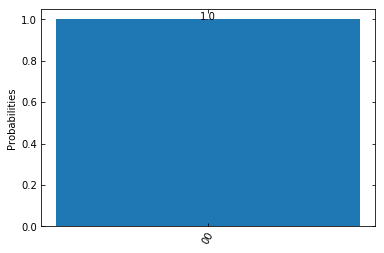

In [2]:
def c_oracle(qci, x0, x1, f_x):
    qci.x(f_x)
    
bn = 3
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[2])
for i in range(bn):
    qc.h(q[i])

c_oracle(qc, q[0], q[1], q[2])

for i in range(bn):
    qc.h(q[i])

for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)

## Example2: Balanced function

{'10': 1024}


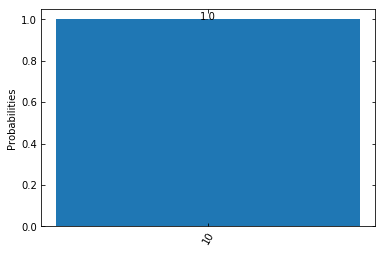

In [3]:
def b_oracle(qci, x0, x1, f_x):
    qci.cx(x0, f_x)
    
bn = 3
cn = 2
q = QuantumRegister(bn)
c = ClassicalRegister(cn)
qc = QuantumCircuit(q, c)

qc.x(q[2])
for i in range(bn):
    qc.h(q[i])

b_oracle(qc, q[0], q[1], q[2])

for i in range(bn):
    qc.h(q[i])

for i in range(cn):
    qc.measure(q[i], c[i])
    
r = execute(qc)
print(r)
plot_histogram(r)